<a href="https://colab.research.google.com/github/Rohitamurali/Backend/blob/master/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload an image


Saving e40bab66a8c1ea47cba6c6b8127f6b80.jpg to e40bab66a8c1ea47cba6c6b8127f6b80 (1).jpg


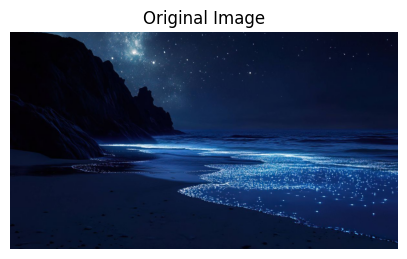

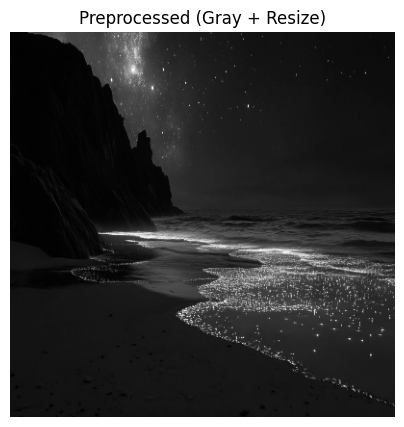

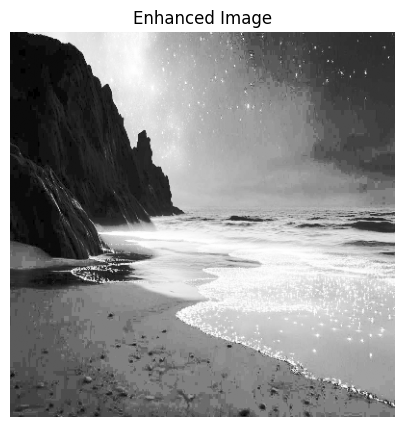

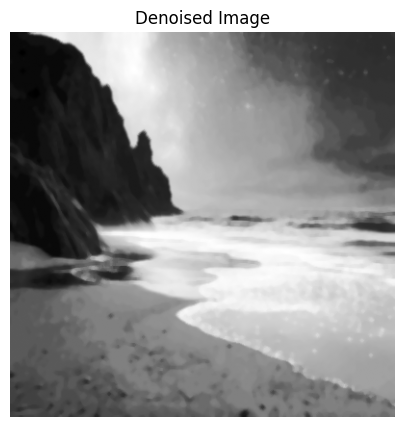

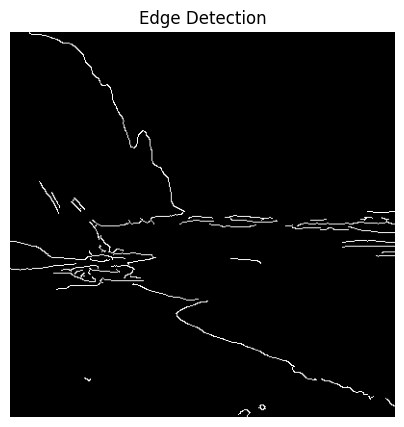

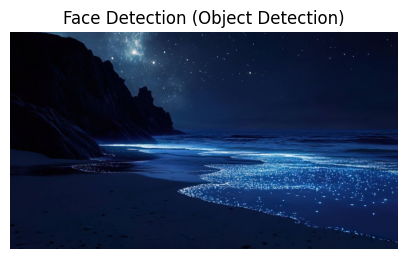

Number of Faces Detected: 0
Face Detection Accuracy (Approx): 0.00%


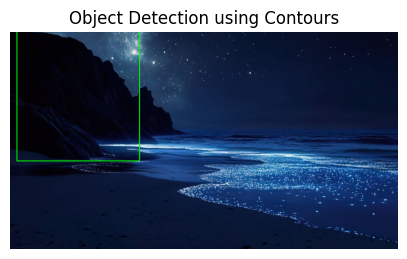

Objects Detected (Contours): 1
Contour Detection Accuracy (Approx): 18.82%
✅ Image Processing Pipeline with Accuracy Completed Successfully


In [ ]:
!pip install opencv-python-headless matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Upload an image")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (400, 400))

plt.figure(figsize=(5,5))
plt.imshow(resized, cmap='gray')
plt.title("Preprocessed (Gray + Resize)")
plt.axis("off")
plt.show()

enhanced = cv2.equalizeHist(resized)

plt.figure(figsize=(5,5))
plt.imshow(enhanced, cmap='gray')
plt.title("Enhanced Image")
plt.axis("off")
plt.show()

gaussian = cv2.GaussianBlur(enhanced, (5,5), 0)
denoised = cv2.medianBlur(gaussian, 5)

plt.figure(figsize=(5,5))
plt.imshow(denoised, cmap='gray')
plt.title("Denoised Image")
plt.axis("off")
plt.show()

edges = cv2.Canny(denoised, 100, 200)

plt.figure(figsize=(5,5))
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")
plt.show()

!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

face_img = img_rgb.copy()
face_area = 0

for (x, y, w, h) in faces:
    cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,0,0), 2)
    face_area += w * h

plt.figure(figsize=(5,5))
plt.imshow(face_img)
plt.title("Face Detection (Object Detection)")
plt.axis("off")
plt.show()

img_area = gray.shape[0] * gray.shape[1]
if len(faces) > 0:
    face_accuracy = (face_area / img_area) * 100
else:
    face_accuracy = 0

print("Number of Faces Detected:", len(faces))
print("Face Detection Accuracy (Approx): {:.2f}%".format(face_accuracy))

_, thresh = cv2.threshold(denoised, 120, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = img_rgb.copy()
object_area = 0
object_count = 0

for cnt in contours:
    if cv2.contourArea(cnt) > 500:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(contour_img,(x,y),(x+w,y+h),(0,255,0),2)
        object_area += w * h
        object_count += 1

plt.figure(figsize=(5,5))
plt.imshow(contour_img)
plt.title("Object Detection using Contours")
plt.axis("off")
plt.show()

if object_count > 0:
    contour_accuracy = (object_area / img_area) * 100
else:
    contour_accuracy = 0

print("Objects Detected (Contours):", object_count)
print("Contour Detection Accuracy (Approx): {:.2f}%".format(contour_accuracy))

print("✅ Image Processing Pipeline with Accuracy Completed Successfully")
